<a href="https://colab.research.google.com/github/Manujk-123/Marvel-Task-Level-1/blob/main/Linear_and_Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Linear regression from Sratch**
Creating a linear regression algorithm from scratch involves implementing the basic concepts of linear regression, such as the cost function and the gradient descent optimization algorithm. Below is a simple implementation using Python.

###**Key Concepts of Linear Regression**</br>

- ###### **Linear Regression Model:** Predicts output 𝑦 from input
X using a linear equation:
𝑦
=
𝑤
𝑋+𝑏  , where
w is the weight vector and
b is the bias.
- **Cost Function:** The Mean Squared Error (MSE) is commonly used as a cost function:

$$
\text{MSE} = \frac{1}{n} \sum (y_{\text{pred}} - y)^2
$$


- **Gradient Descent:** An optimization algorithm to minimize the cost function by updating weights iteratively.
Implementat

 ### **Implementing Linear Regression from Scratch in Python:**

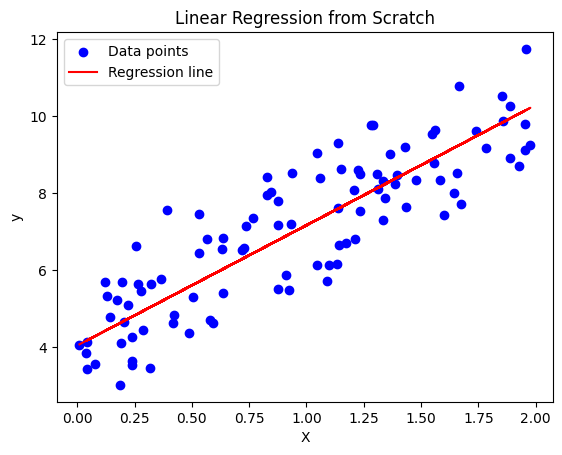

Weight (w): [3.12593652], Bias (b): 4.0446871544206235
Mean Squared Error: 1.0014986231280785


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_pred = self.predict(X)
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3X + noise

# Reshape y to be a 1D array
y = y.flatten()

# Create and fit the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Linear Regression from Scratch')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the parameters
print(f"Weight (w): {model.w}, Bias (b): {model.b}")
print(f"Mean Squared Error: {model.mse(y, y_pred)}")


***

##**Logistic Regression from Scratch**
###**Explanation:**
- **Sigmoid Function:** The sigmoid function converts the linear combination of inputs into a range of probabilities between 0 and 1.

- **Training the Model:** In this step, the model learns the optimal weights and bias using gradient descent to minimize the loss function.

- **Prediction:** After training, the model predicts the class labels based on the input features.

- **Generate Synthetic Dataset:** We generate a synthetic dataset for demonstration purposes.

- **Train the Model:** We train the logistic regression model on the synthetic dataset.

- **Predict and Calculate Accuracy:** We predict the labels for the training data and calculate the accuracy of the model.

- **Plot Decision Boundary:** We plot the decision boundary to visualize how the model separates the two classes in the feature space.

Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



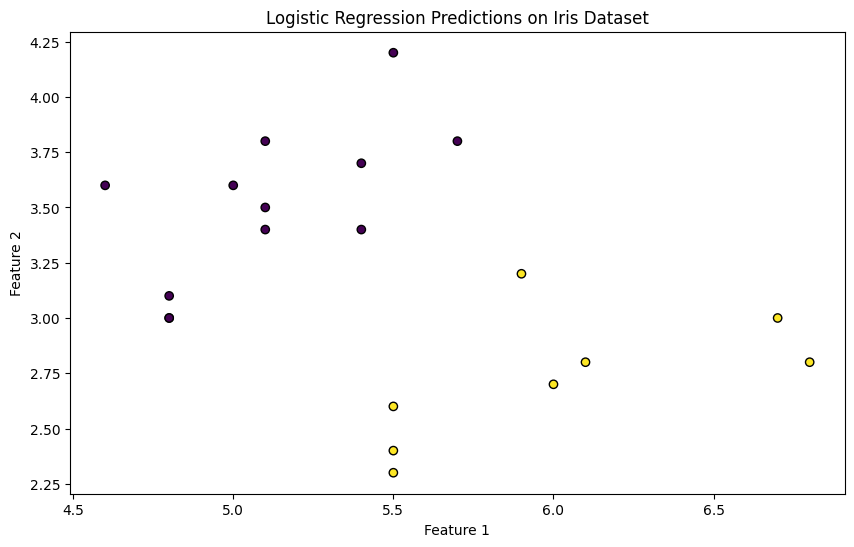

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Custom Logistic Regression Class
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient descent
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

# Load the Iris dataset
iris = load_iris()
X = iris.data[iris.target != 2]  # Use only two classes for binary classification
y = iris.target[iris.target != 2]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the custom Logistic Regression model
model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Predictions on Iris Dataset')
plt.show()
